In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("D:\DS_March\Paris_Housing_Model\Paris Housing\ParisHousing.csv")
dataset.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [3]:
dataset.shape

(10000, 17)

All attributes are numeric variables and they are listed below:

- **squareMeters**
- **numberOfRooms**
- **hasYard** (1 if yes, 0 if no)
- **hasPools** (1 if yes, 0 if no)
- **floors** - Number of floors
- **cityCode** - Zip code
- **cityPartRange** - The higher the range, the more exclusive the neighborhood is
- **numPrevOwners** - Number of previous owners
- **yearMade** - Year made
- **isNewBuilt** (1 if yes, 0 if no)
- **hasStormProtector** (1 if yes, 0 if no)
- **basement** - Basement square meters
- **attic** - Attic square meters
- **garage** - Garage size
- **hasStorageRoom** (1 if yes, 0 if no)
- **hasGuestRoom** - Number of guest rooms
- **price** - Predicted value


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [7]:
dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
dataset.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

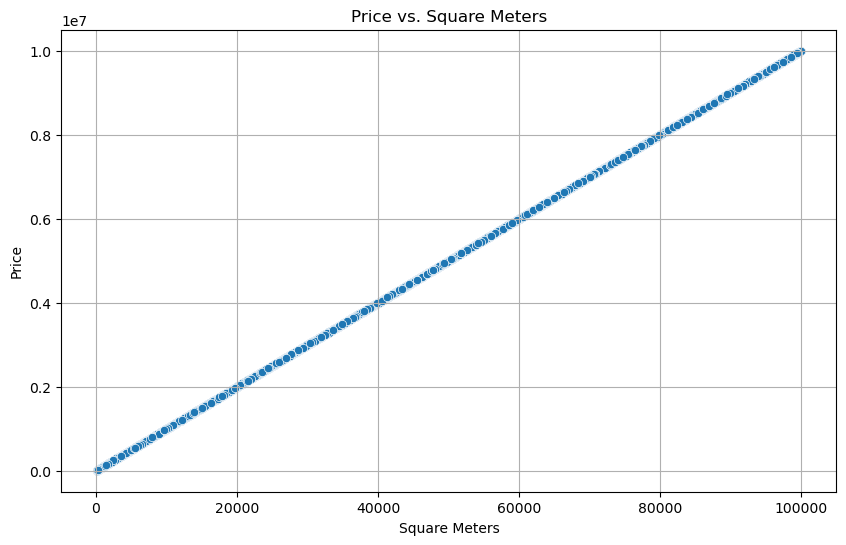

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x = dataset['squareMeters'], y = dataset['price'])

# Adding titles and labels
plt.title('Price vs. Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Price')

# Display the plot
plt.grid(True)
plt.show()


#### squareMeters and price are  directly co-related

In [11]:
dataset['numberOfRooms'].value_counts()

numberOfRooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
31     84
34     84
40     82
9      75
Name: count, Length: 100, dtype: int64

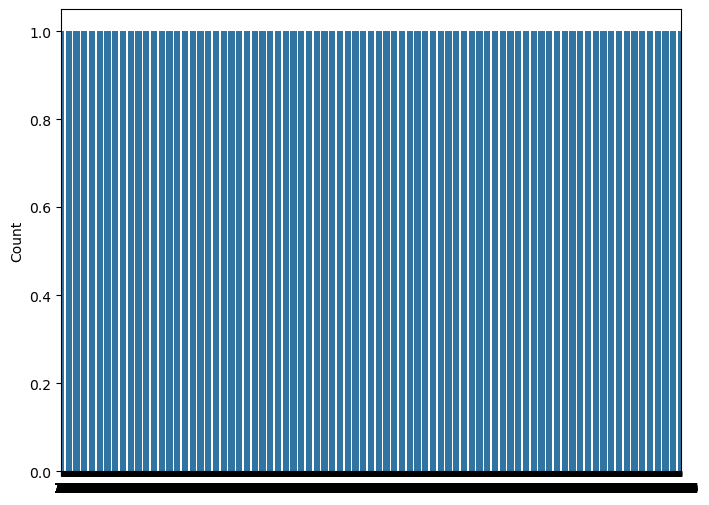

In [12]:
plt.figure(figsize = (8, 6))
sns.countplot(dataset["numberOfRooms"])
plt.ylabel('Count')
plt.show()

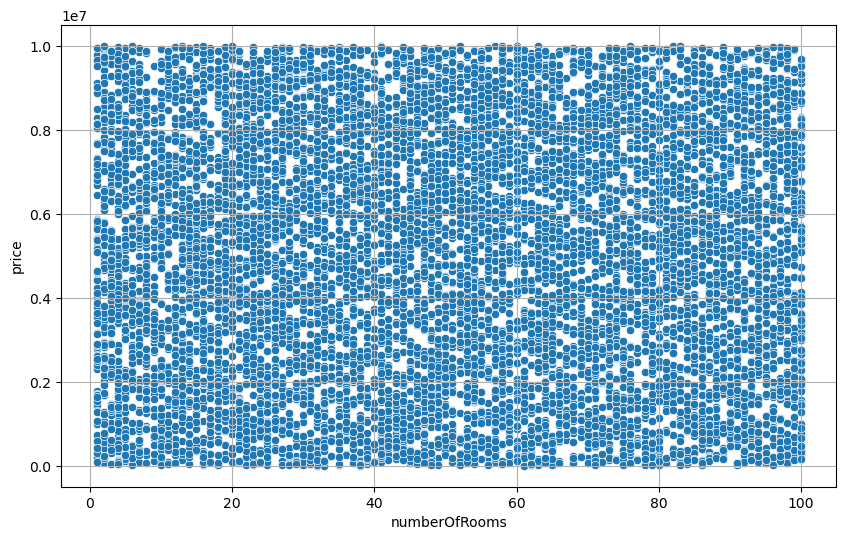

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = dataset['numberOfRooms'], y = dataset['price'])

# Display the plot
plt.grid(True)
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\3411136783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['numberOfRooms'], bins = 10)


<Axes: xlabel='numberOfRooms', ylabel='Density'>

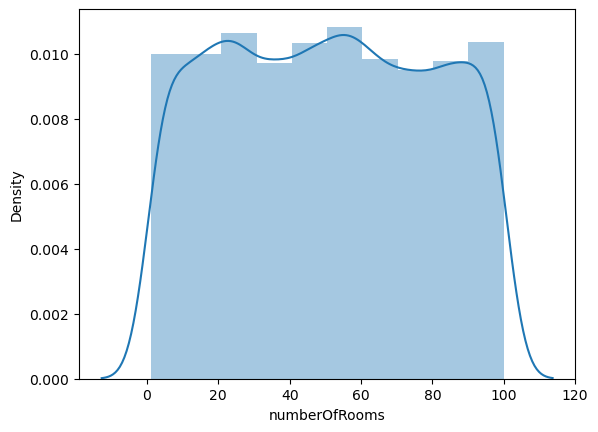

In [14]:
sns.distplot(dataset['numberOfRooms'], bins = 10)

In [15]:
dataset.corr()['numberOfRooms']

squareMeters         0.009573
numberOfRooms        1.000000
hasYard             -0.011240
hasPool              0.017015
floors               0.022244
cityCode             0.009040
cityPartRange        0.008340
numPrevOwners        0.016766
made                 0.003978
isNewBuilt          -0.002865
hasStormProtector   -0.001656
basement            -0.013990
attic                0.012061
garage               0.023188
hasStorageRoom      -0.004760
hasGuestRoom        -0.015529
price                0.009591
Name: numberOfRooms, dtype: float64

In [16]:
dataset['hasYard'].value_counts()

hasYard
1    5087
0    4913
Name: count, dtype: int64

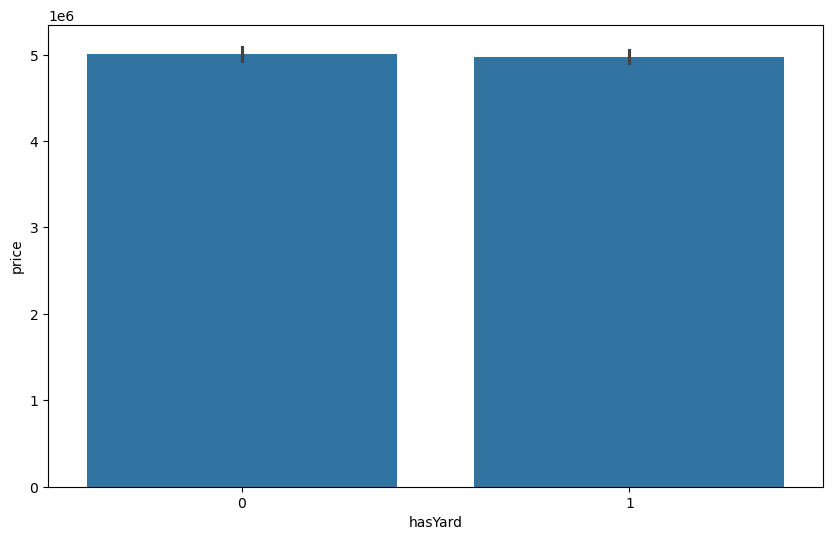

In [17]:

plt.figure(figsize=(10, 6))
sns.barplot(x = dataset['hasYard'], y = dataset['price'])

plt.show()


In [18]:
dataset['hasPool'].value_counts()

hasPool
0    5032
1    4968
Name: count, dtype: int64

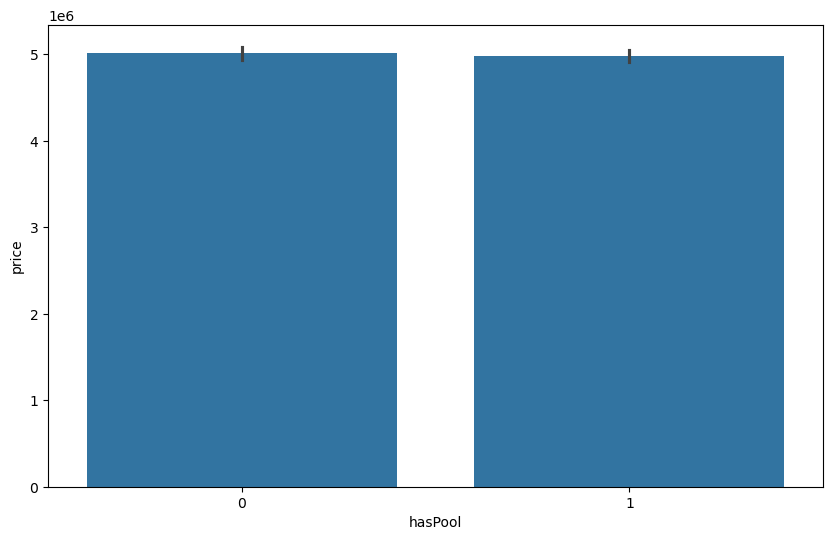

In [19]:

plt.figure(figsize=(10, 6))
sns.barplot(x = dataset['hasPool'], y = dataset['price'])

plt.show()


In [20]:
dataset['floors'].value_counts()

floors
97     126
55     122
77     117
28     116
3      116
      ... 
48      83
15      83
74      83
100     82
92      75
Name: count, Length: 100, dtype: int64

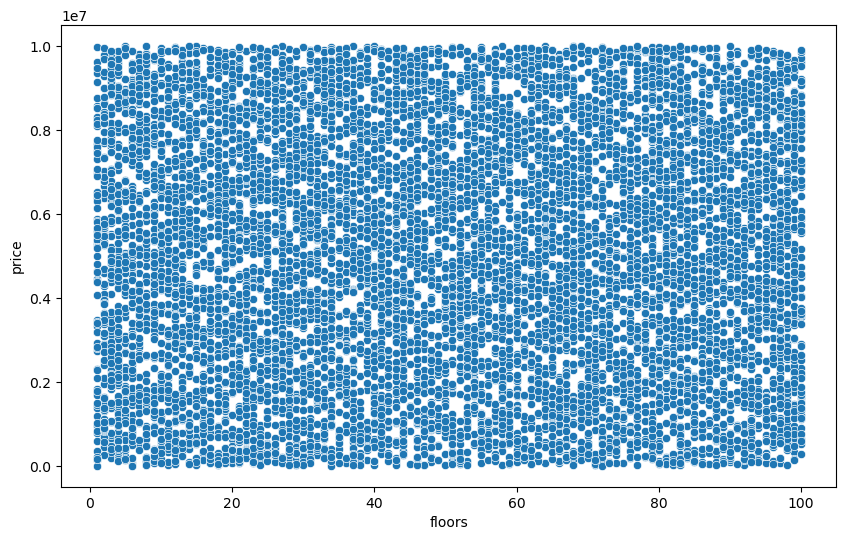

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x = dataset['floors'], y = dataset['price'])
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\4165564408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['floors'], bins = 10)


<Axes: xlabel='floors', ylabel='Density'>

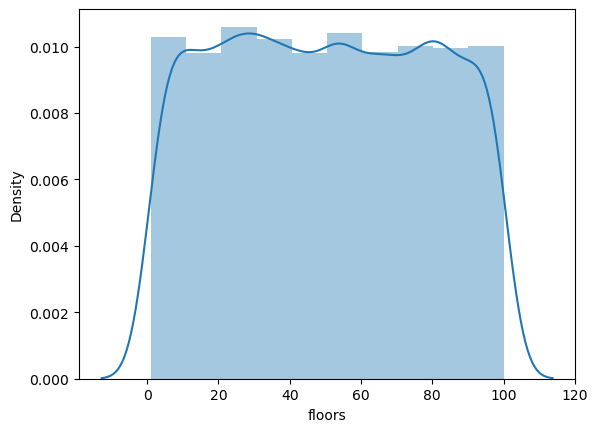

In [22]:
sns.distplot(dataset['floors'], bins = 10)

In [23]:
dataset.corr()['floors']

squareMeters         0.001109
numberOfRooms        0.022244
hasYard             -0.000883
hasPool             -0.004006
floors               1.000000
cityCode             0.002207
cityPartRange       -0.004921
numPrevOwners        0.002463
made                 0.005022
isNewBuilt           0.002458
hasStormProtector   -0.008566
basement             0.006228
attic               -0.000270
garage               0.011303
hasStorageRoom       0.003616
hasGuestRoom        -0.021155
price                0.001654
Name: floors, dtype: float64

In [24]:
dataset['cityCode'].nunique()

9509

In [25]:
dataset.corr()['cityCode']

squareMeters        -0.001541
numberOfRooms        0.009040
hasYard              0.006760
hasPool              0.008072
floors               0.002207
cityCode             1.000000
cityPartRange        0.011334
numPrevOwners       -0.007549
made                 0.009266
isNewBuilt          -0.000224
hasStormProtector   -0.004941
basement             0.002652
attic               -0.002019
garage              -0.002208
hasStorageRoom       0.002554
hasGuestRoom        -0.003338
price               -0.001539
Name: cityCode, dtype: float64

In [26]:
dataset['cityPartRange'].nunique()

10

<Axes: xlabel='cityPartRange', ylabel='price'>

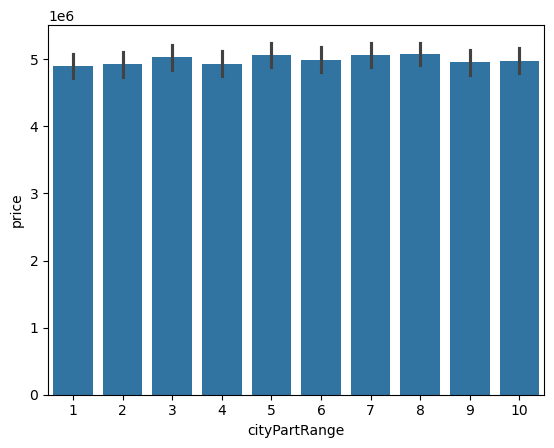

In [27]:
sns.barplot(x = dataset['cityPartRange'], y = dataset['price'])

In [28]:
dataset.corr()['cityCode']

squareMeters        -0.001541
numberOfRooms        0.009040
hasYard              0.006760
hasPool              0.008072
floors               0.002207
cityCode             1.000000
cityPartRange        0.011334
numPrevOwners       -0.007549
made                 0.009266
isNewBuilt          -0.000224
hasStormProtector   -0.004941
basement             0.002652
attic               -0.002019
garage              -0.002208
hasStorageRoom       0.002554
hasGuestRoom        -0.003338
price               -0.001539
Name: cityCode, dtype: float64

In [29]:
dataset['numPrevOwners'].nunique()

10

<Axes: xlabel='numPrevOwners', ylabel='price'>

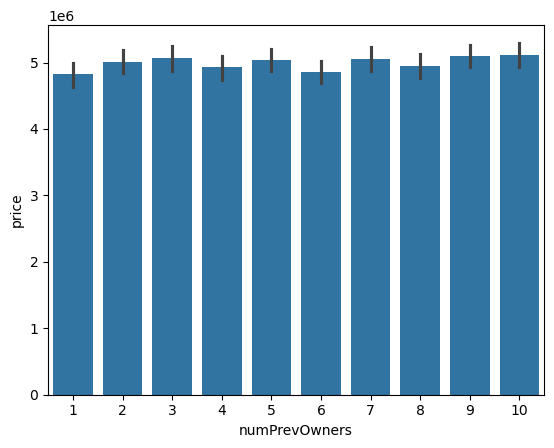

In [30]:
sns.barplot(x = dataset['numPrevOwners'], y = dataset['price'])

In [31]:
dataset.corr()['numPrevOwners']

squareMeters         0.016619
numberOfRooms        0.016766
hasYard              0.004279
hasPool             -0.006848
floors               0.002463
cityCode            -0.007549
cityPartRange        0.009238
numPrevOwners        1.000000
made                 0.006858
isNewBuilt          -0.017420
hasStormProtector    0.002522
basement            -0.000862
attic                0.000719
garage               0.020268
hasStorageRoom       0.031707
hasGuestRoom        -0.006082
price                0.016619
Name: numPrevOwners, dtype: float64

In [32]:
dataset['made'].nunique()

32

C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\4028001326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['made'], bins = 10)


<Axes: xlabel='made', ylabel='Density'>

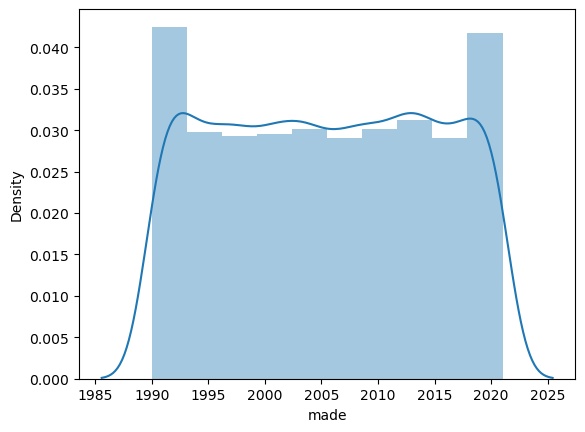

In [33]:
sns.distplot(dataset['made'], bins = 10)

In [34]:
dataset['isNewBuilt'].value_counts()

isNewBuilt
0    5009
1    4991
Name: count, dtype: int64

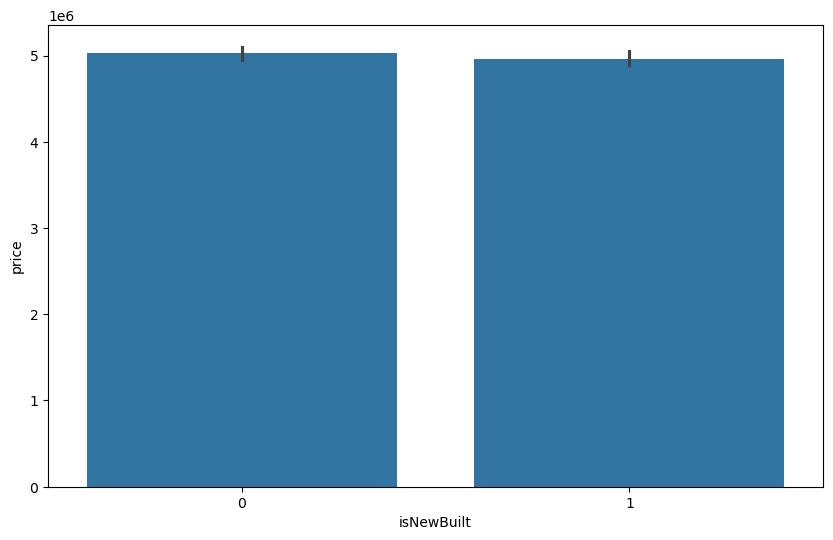

In [35]:

plt.figure(figsize=(10, 6))
sns.barplot(x = dataset['isNewBuilt'], y = dataset['price'])

plt.show()


In [36]:
dataset['hasStormProtector'].value_counts()

hasStormProtector
0    5001
1    4999
Name: count, dtype: int64

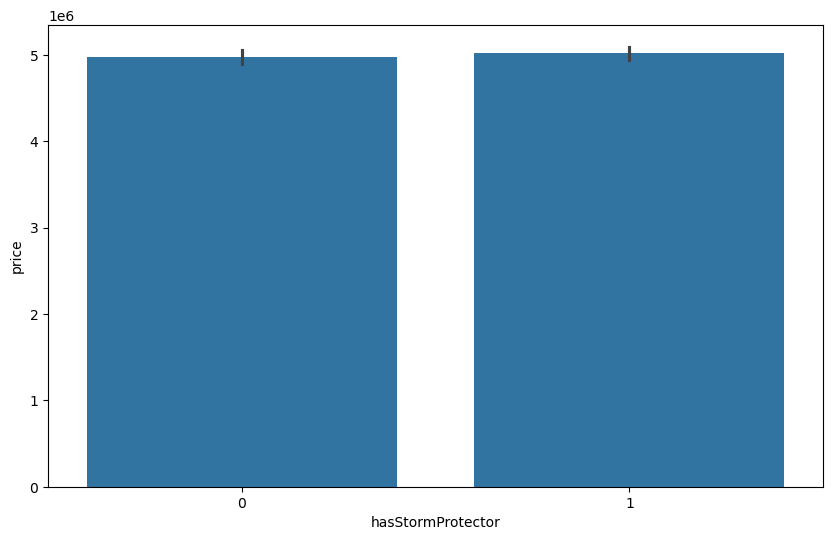

In [37]:

plt.figure(figsize=(10, 6))
sns.barplot(x = dataset['hasStormProtector'], y = dataset['price'])

plt.show()


In [38]:
dataset['basement'].value_counts()

basement
2192    6
6899    6
1421    6
4170    6
5688    5
       ..
1935    1
8267    1
721     1
5775    1
8485    1
Name: count, Length: 6352, dtype: int64

In [39]:
dataset['basement'].nunique()

6352

C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\1029691411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['basement'], bins = 10)


<Axes: xlabel='basement', ylabel='Density'>

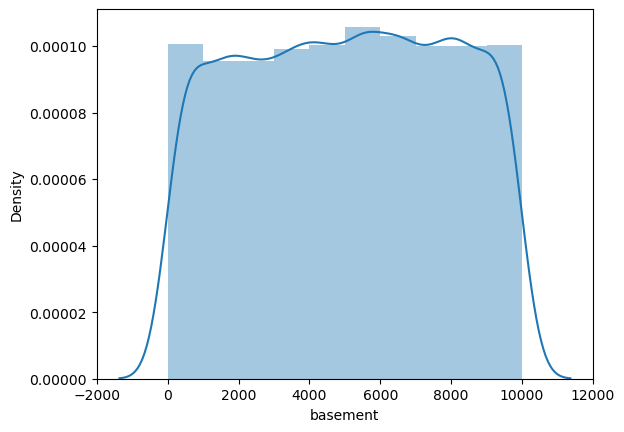

In [40]:
sns.distplot(dataset['basement'], bins = 10)

In [41]:
dataset['attic'].nunique()

6267

C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\3109163720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['attic'], bins = 10)


<Axes: xlabel='attic', ylabel='Density'>

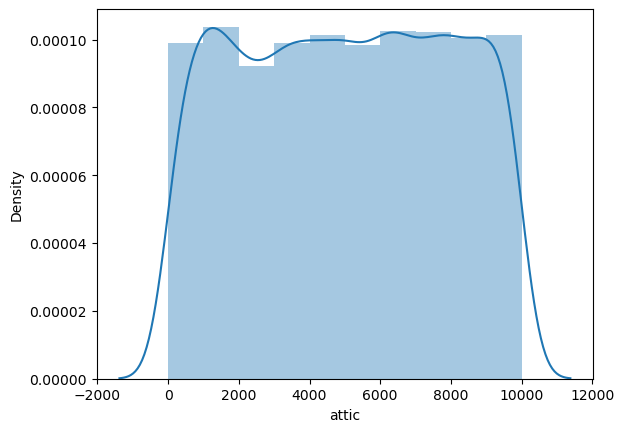

In [42]:
sns.distplot(dataset['attic'], bins = 10)

<Axes: >

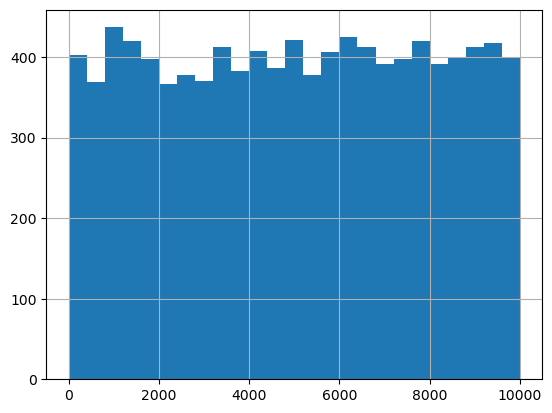

In [43]:
dataset['attic'].hist(bins=25)

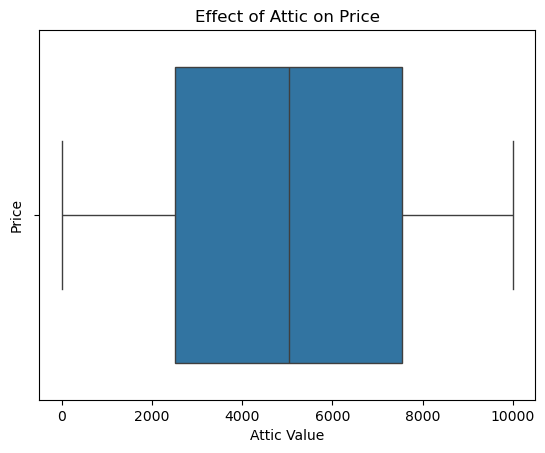

In [44]:
sns.boxplot(x='attic', data=dataset)
plt.title('Effect of Attic on Price')
plt.xlabel('Attic Value')
plt.ylabel('Price')
plt.show()

In [45]:
dataset['garage'].nunique()

901

C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\1771804943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['garage'], bins = 10)


<Axes: xlabel='garage', ylabel='Density'>

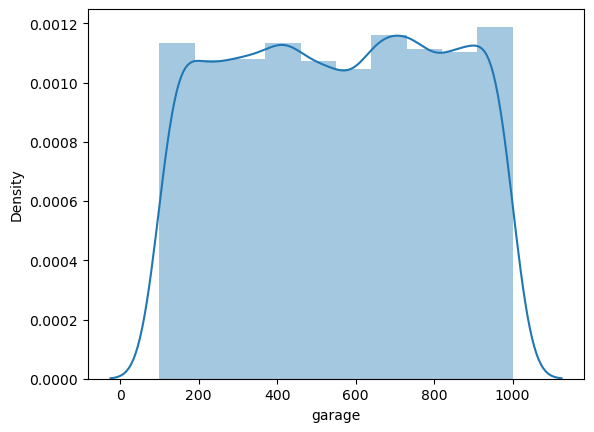

In [46]:
sns.distplot(dataset['garage'], bins = 10)

In [47]:
dataset['hasStorageRoom'].nunique()

2

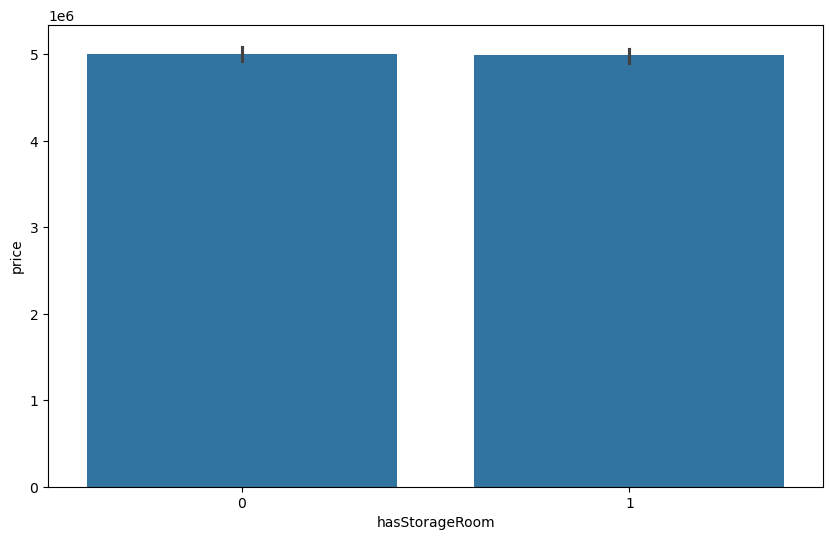

In [48]:

plt.figure(figsize=(10, 6))
sns.barplot(x = dataset['hasStorageRoom'], y = dataset['price'])

plt.show()


In [49]:
dataset['hasGuestRoom'].nunique()

11

C:\Users\Hp\AppData\Local\Temp\ipykernel_17768\3740279192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['hasGuestRoom'], bins = 10)


<Axes: xlabel='hasGuestRoom', ylabel='Density'>

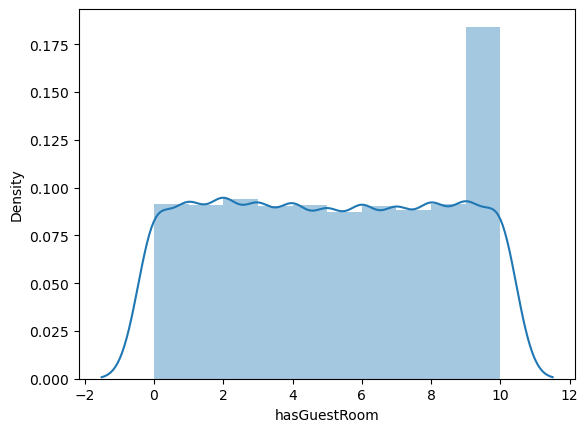

In [50]:
sns.distplot(dataset['hasGuestRoom'], bins = 10)

In [51]:
dataset.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


<Axes: >

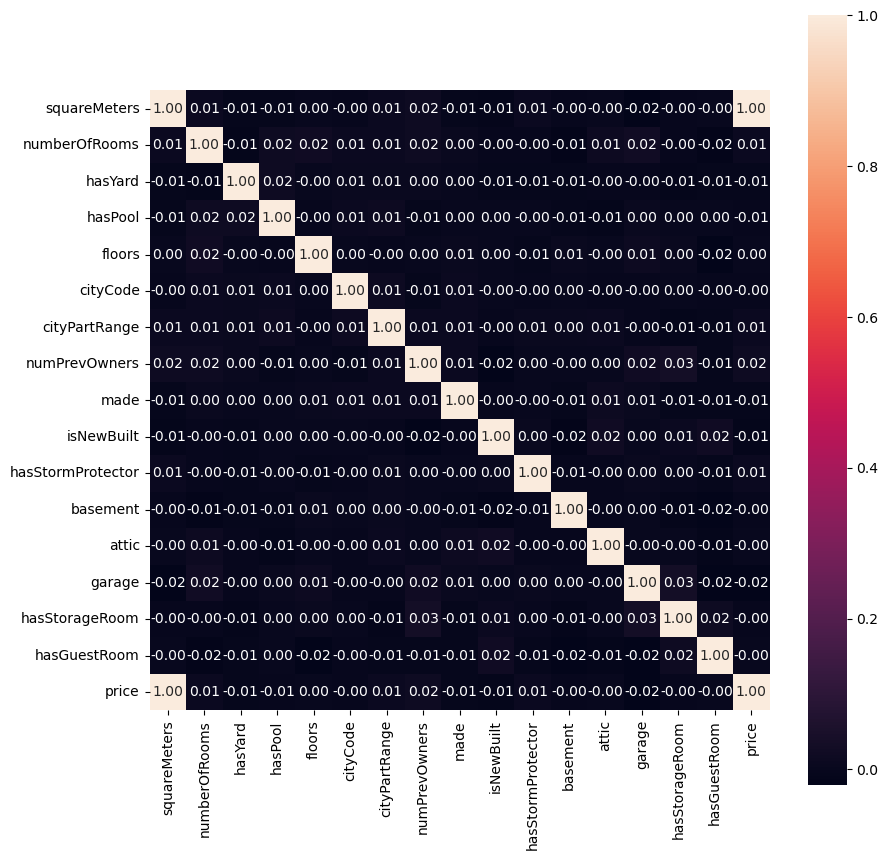

In [52]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), fmt = '0.2f',square = True, annot = True)

## Feature Selection

In [54]:
features = dataset.drop(columns = 'made').columns
features

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

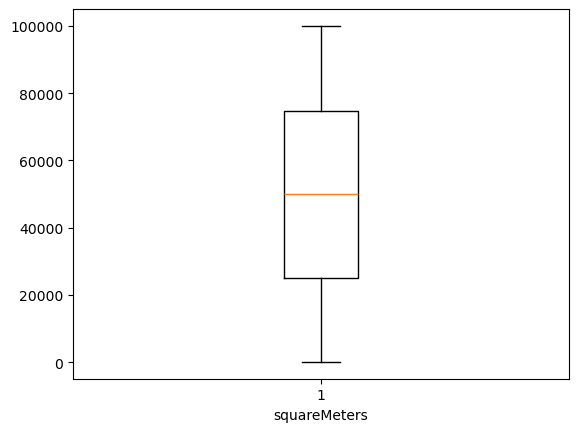

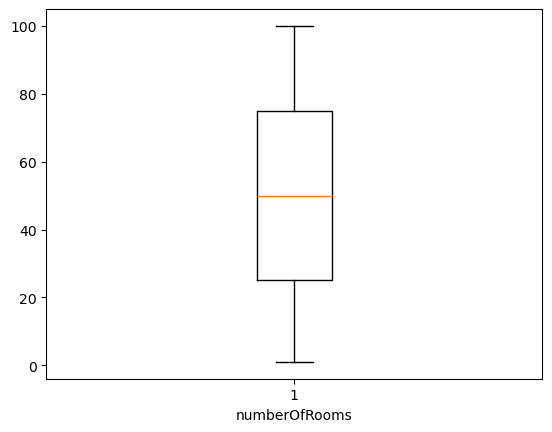

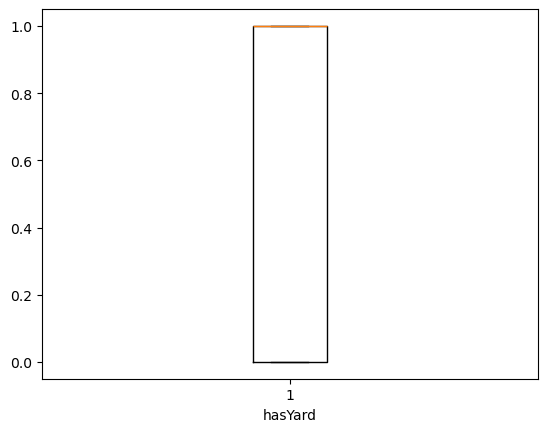

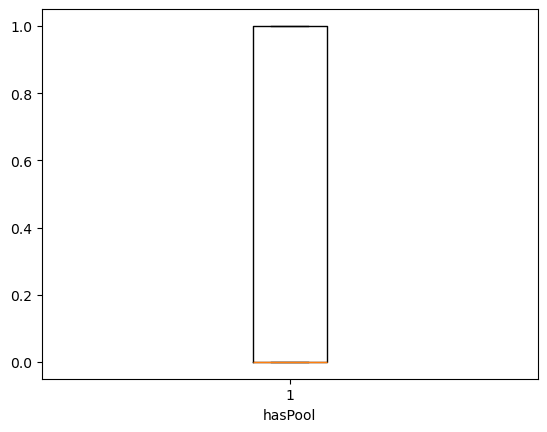

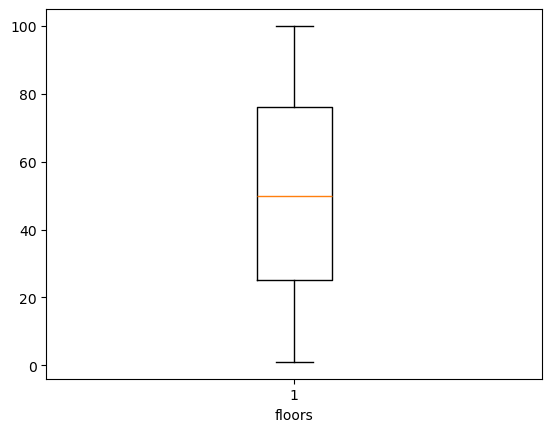

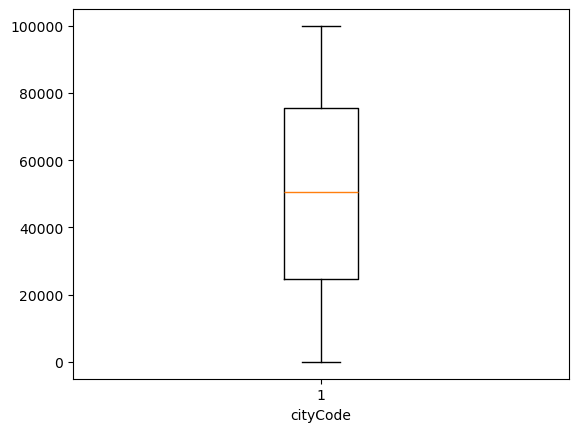

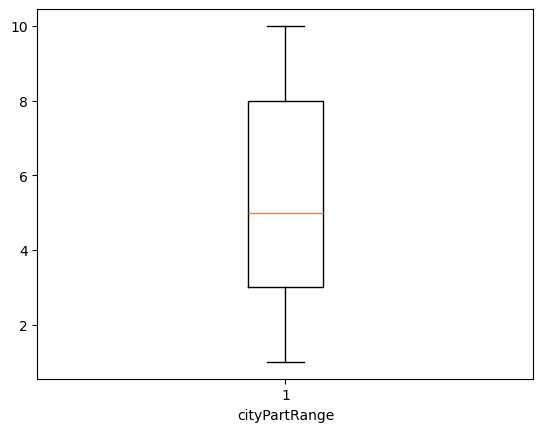

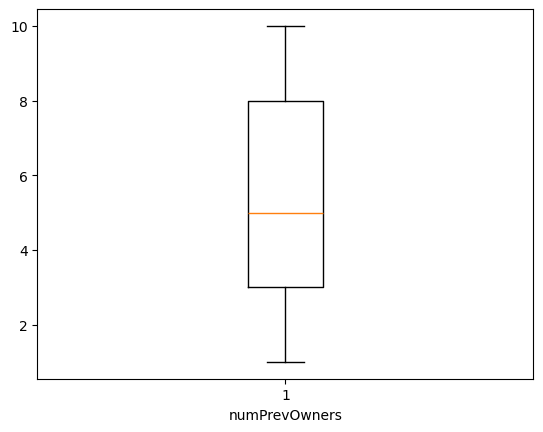

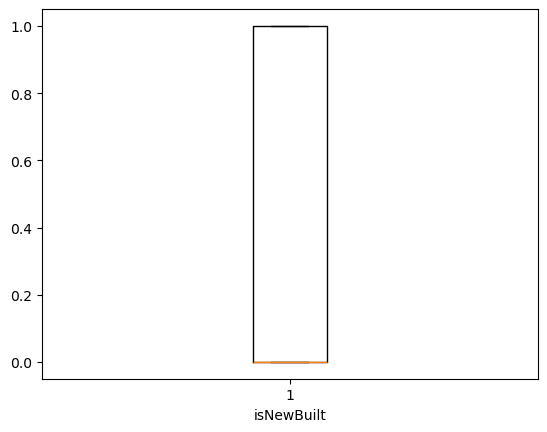

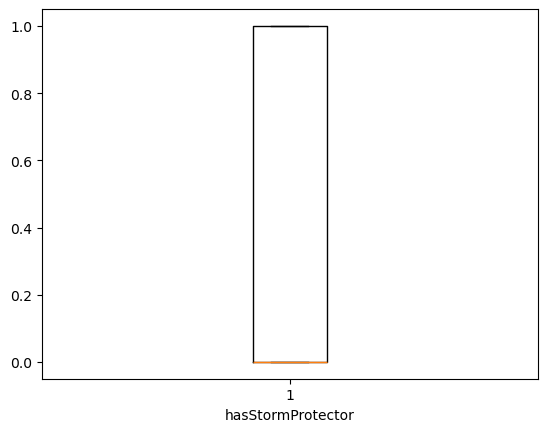

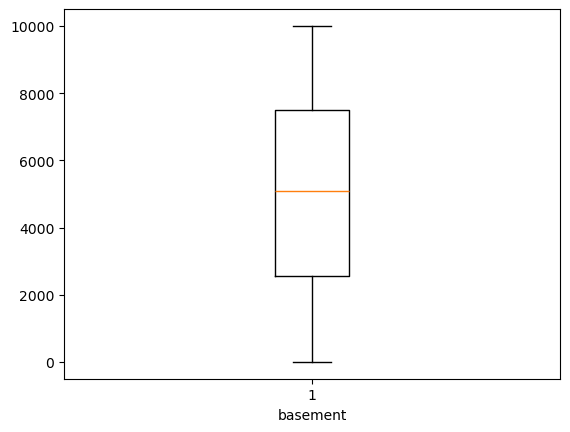

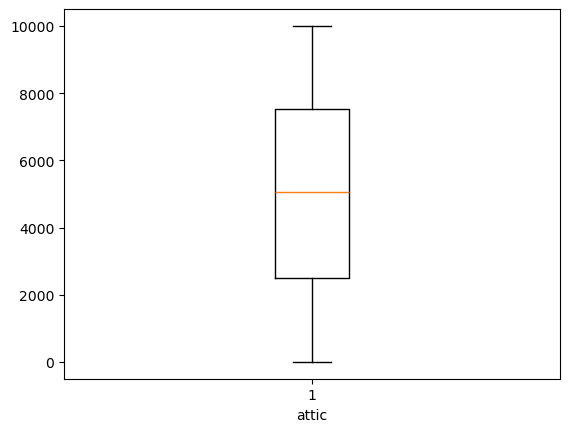

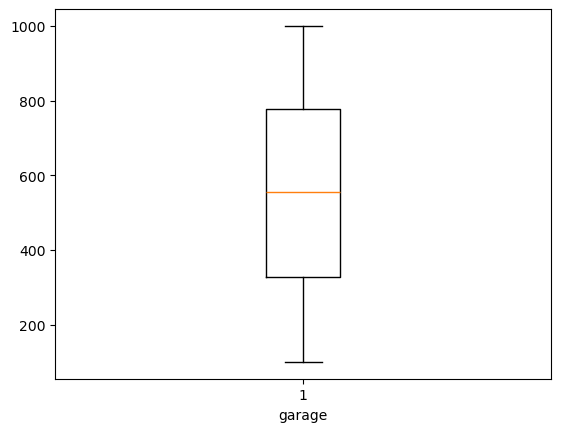

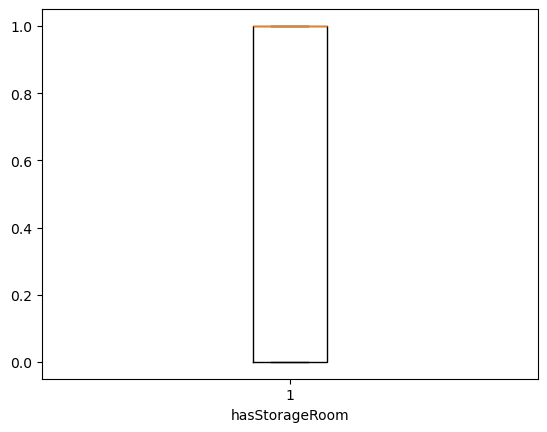

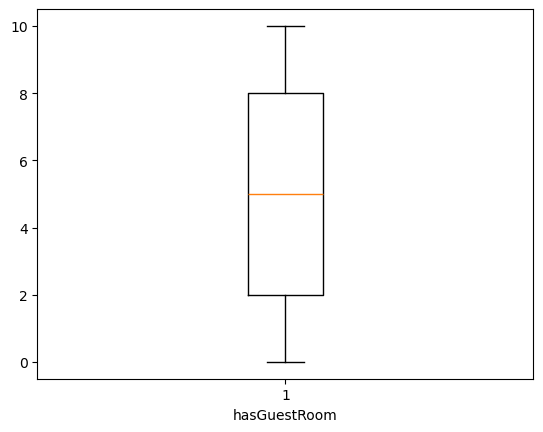

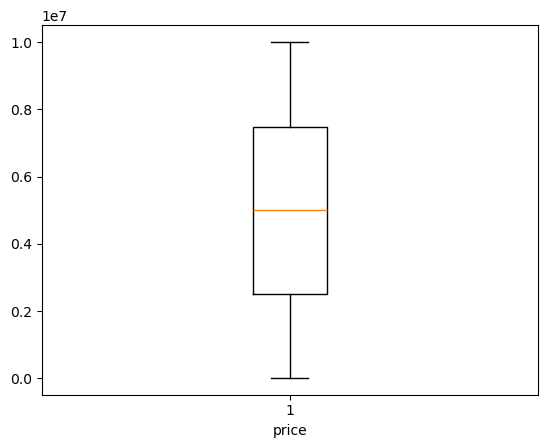

In [55]:
for feature in features:
    plt.boxplot(dataset[feature])
    plt.xlabel(feature)
    plt.show()
        

In [56]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [57]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [58]:
X = dataset.drop(columns = 'price', axis = 1)
Y = dataset['price']

In [59]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [60]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [61]:
selected_feat

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom'],
      dtype='object')

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [63]:
featurs_df = pd.DataFrame(scaler.fit_transform(dataset[selected_feat]), columns=selected_feat)

In [64]:
featurs_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.755020,0.020202,0.0,1.0,0.626263,0.093747,0.222222,0.777778,0.483871,0.0,1.0,0.4313,0.900490,0.951111,0.0,0.7
1,0.807547,0.383838,1.0,1.0,0.979798,0.393977,0.777778,0.555556,0.806452,1.0,0.0,0.3653,0.243524,0.031111,1.0,0.2
2,0.556731,0.575758,0.0,1.0,0.181818,0.344712,0.555556,0.777778,1.000000,0.0,0.0,0.2937,0.885189,0.038889,1.0,0.9
3,0.322560,0.464646,0.0,0.0,0.050505,0.279500,1.000000,0.333333,0.709677,0.0,1.0,0.0659,0.714071,0.287778,0.0,0.3
4,0.704034,0.181818,1.0,1.0,0.898990,0.380610,0.222222,0.666667,0.000000,1.0,0.0,0.8435,0.242824,0.213333,1.0,0.4


In [65]:
processed_housing = featurs_df.to_csv("D:\DS_March\Paris_Housing_Model\Paris Housing\processed_housing.csv", index = False)

## Prices are highly correlated to squareMeters

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = dataset[selected_feat]
Y = dataset['price']

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [72]:
model.fit(X_train, Y_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score

In [74]:
Y_pred = model.predict(X_train)

In [75]:
r2 = r2_score(Y_train, Y_pred)
mape = np.mean(np.abs((Y_train - Y_pred) / Y_train)) * 100
print(f"R²: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

R²: 1.00
MAPE: 0.09%


In [76]:
prediction = model.predict(X_test)

In [77]:

r2 = r2_score(Y_test, prediction)
mape = np.mean(np.abs((Y_test - prediction) / Y_test)) * 100

print(f"R²: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

R²: 1.00
MAPE: 0.12%


In [ ]:
while True:
    response = input("Do you want to make prediction? (y/n): ")
    if response.lower()!= 'y':
        break
    # Get user input for feature values
    user_input = input("Enter the parameters: ").split(',')
    x_user = np.array([float(x) for x in user_input])  # Convert the input to a 1D array

    # Reshape the array to have 1 row and 16 columns
    x_user = x_user.reshape(1, -1)  

    # Make a prediction using the trained model
    y_pred = model.predict(x_user)

    # Print the predicted value
    print(f"Predicted value: {y_pred[0]:.2f}")

    # Ask if the user wants to continue

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))